In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
taylor = pd.read_csv("taylor_swift_lyrics.csv", encoding = "ISO-8859-1")

In [24]:
taylor.head()

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


In [25]:
taylor["track_title"].unique()

array(['Tim McGraw', 'Picture To Burn', 'Teardrops On My Guitar',
       'A Place In This World', 'Cold as You', 'The Outside',
       'Tied Together With A Smile', 'Stay Beautiful',
       "Should've Said No", "Mary's Song (Oh My My My)", 'Our Song',
       "I'm Only Me When I'm With You", 'Invisible',
       'A Perfectly Good Heart', 'Fearless', 'Fifteen', 'Love Story',
       'Hey Stephen', 'White Horse', 'You Belong With Me',
       'Breathe (Ft.\xa0Colbie\xa0Caillat)', 'Tell Me Why',
       "You're Not Sorry", 'The Way I Loved You', 'Forever & Always',
       'The Best Day', 'Change', 'Mine', 'Sparks Fly', 'Back To December',
       'Speak Now', 'Dear John', 'Mean', 'The Story of Us',
       'Never Grow Up', 'Enchanted', 'Better Than Revenge', 'Innocent',
       'Haunted', 'Last Kiss', 'Long Live', 'Ours', 'If This Was a Movie',
       'Superman', 'State of Grace', 'Red', 'Treacherous',
       'I Knew You Were Trouble', 'All Too Well', '22', 'I Almost Do',
       'We Are Never Eve

Text(0.5, 0, 'Song Titles')

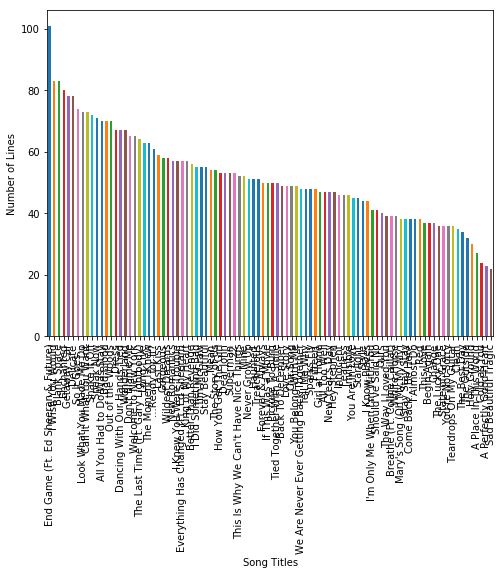

In [26]:
plt.figure(figsize = (8,6))
taylor["track_title"].value_counts().plot(kind = "bar")
plt.ylabel("Number of Lines")
plt.xlabel("Song Titles")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


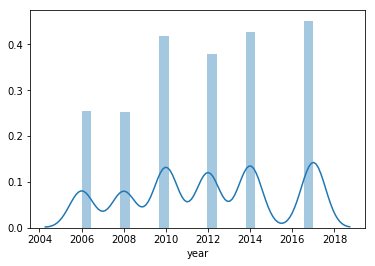

In [27]:
sns.distplot(taylor["year"])

In [28]:
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



In [29]:
sent = pd.read_csv('vader_lexicon.txt', sep='\t',
                   usecols=[0, 1], header=None, names=['token', 'polarity'],
                   index_col='token')
sent.head()

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [30]:
taylor["lyric"] = taylor["lyric"].str.lower()

In [31]:
punct_re = r'[^\w\s]'
taylor["no_punc"] = taylor["lyric"].str.replace(punct_re, " ")

In [32]:
tidy_format = (
    taylor['no_punc']
    .str.split(expand=True)
    .stack()
    .reset_index(level=1)
    .rename(columns={'level_1': 'num', 0: 'word'})
)
tidy_format.head()

,num,word
0,0,he
0,1,said
0,2,the
0,3,way
0,4,my


In [33]:
taylor["polarity"] = (
    tidy_format
    .merge(sent, how="left", left_on="word", right_index=True)
    .reset_index()
    .loc[:, ['index', 'polarity']]
    .groupby('index')
    .sum()
    .fillna(0)
)


In [34]:
taylor

,artist,album,track_title,track_n,lyric,line,year,no_punc,polarity
0,Taylor Swift,Taylor Swift,Tim McGraw,1,he said the way my blue eyes shined,1,2006,he said the way my blue eyes shined,0.0
1,Taylor Swift,Taylor Swift,Tim McGraw,1,put those georgia stars to shame that night,2,2006,put those georgia stars to shame that night,-2.1
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"i said, ""that's a lie""",3,2006,i said that s a lie,0.0
3,Taylor Swift,Taylor Swift,Tim McGraw,1,just a boy in a chevy truck,4,2006,just a boy in a chevy truck,0.0
4,Taylor Swift,Taylor Swift,Tim McGraw,1,that had a tendency of gettin' stuck,5,2006,that had a tendency of gettin stuck,-1.0
5,Taylor Swift,Taylor Swift,Tim McGraw,1,on backroads at night,6,2006,on backroads at night,0.0
6,Taylor Swift,Taylor Swift,Tim McGraw,1,and i was right there beside him all summer long,7,2006,and i was right there beside him all summer long,0.0
7,Taylor Swift,Taylor Swift,Tim McGraw,1,and then the time we woke up to find that summ...,8,2006,and then the time we woke up to find that summ...,0.0
8,Taylor Swift,Taylor Swift,Tim McGraw,1,but when you think tim mcgraw,9,2006,but when you think tim mcgraw,0.0
9,Taylor Swift,Taylor Swift,Tim McGraw,1,i hope you think my favorite song,10,2006,i hope you think my favorite song,3.9


In [35]:
print("Most negative lyrics:")
for t in taylor.sort_values("polarity").head()["lyric"]:
    print("\n ", t)

Most negative lyrics:

  and the haters gonna hate, hate, hate, hate, hate (haters gonna hate)

  and the fakers gonna fake, fake, fake, fake, fake (fake n' fake n' fake)

  and the haters gonna hate, hate, hate, hate, hate

  and the haters gonna hate, hate, hate, hate, hate

  and the fakers gonna fake, fake, fake, fake, fake


In [36]:
print("Most positive lyrics:")
for t in taylor.sort_values("polarity", ascending=False).head()["lyric"]:
    print("\n ", t)

Most positive lyrics:

  everybody loves pretty, everybody loves cool

  beautiful, beautiful, beautiful?

  beautiful, beautiful, beautiful?

  you are in love, true love

  you are in love, true love


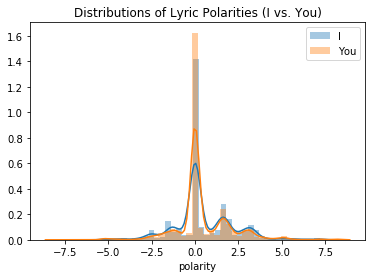

In [37]:
sns.distplot(taylor[taylor["lyric"].str.lower().str.contains(" i ")]["polarity"], label= "I")
sns.distplot(taylor[taylor['lyric'].str.lower().str.contains("you")]["polarity"], label = "You")
plt.title("Distributions of Lyric Polarities (I vs. You)")
plt.legend();

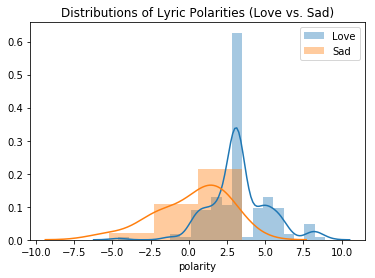

In [38]:
sns.distplot(taylor[taylor["lyric"].str.lower().str.contains("love")]["polarity"], label= "Love")
sns.distplot(taylor[taylor['lyric'].str.lower().str.contains("sad")]["polarity"], label = "Sad")
plt.title("Distributions of Lyric Polarities (Love vs. Sad)")
plt.legend();

In [39]:
taylor_songs = taylor[["track_title", "polarity"]].groupby("track_title").mean()

In [40]:
taylor_songs.sort_values("polarity")

,polarity
track_title,
Shake It Off,-1.741667
I Knew You Were Trouble,-1.152632
Picture To Burn,-1.136000
Bad Blood,-0.411429
You're Not Sorry,-0.377778
The Story of Us,-0.342593
So It Goes...,-0.217568
Tell Me Why,-0.187500
Mean,-0.187037


In [41]:
#taylor_songs[["track_title"]]

In [42]:
taylor_albums = taylor[["album", "polarity", "year"]].groupby("album").mean()

In [43]:
taylor_albums["album"] = taylor_albums.index

In [44]:
taylor_albums = taylor_albums.sort_values("year").reset_index(drop = True)

In [45]:
taylor_albums = taylor_albums[['album','polarity', 'year']]

In [46]:
taylor_albums[["album"]]

,album
0,Taylor Swift
1,Fearless
2,Speak Now
3,Red
4,1989
5,reputation


In [47]:
#sns.distplot(taylor[taylor["lyric"].str.lower().str.contains("love")]["polarity"], label= "Love")

Text(0.5, 1.0, 'Average Polarity of Each Album')

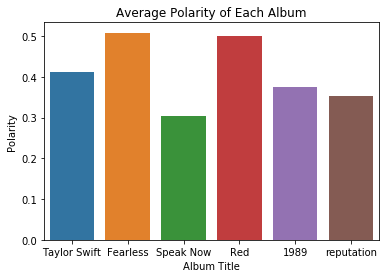

In [48]:
sns.barplot(x = "album", y = "polarity", data = taylor_albums)
plt.ylabel("Polarity")
plt.xlabel("Album Title")
plt.title("Average Polarity of Each Album")

In [49]:
#taylor

In [50]:
all_words = "".join(taylor["no_punc"])

In [51]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts


In [52]:
#word_count(all_words)

In [53]:
words_freq = pd.DataFrame.from_dict(word_count(all_words), orient = "index", columns = ["count"]).sort_values("count", ascending=False)

In [54]:
words_freq["words"] = words_freq.index

In [55]:
words_freq = words_freq.reset_index(drop=True)

In [56]:
most_common_word = words_freq.sort_values("count")["words"][0]

In [57]:
most_common_word

'you'

In [58]:
#taylor #.columns# = taylor.drop(columns = ['category', 'cateogry'])

In [59]:
#taylor["category"] = [None]*len(taylor)

In [60]:
for i in range(0,len(taylor)):
    if taylor.at[i,"polarity"] < - 2:
        taylor.at[i,"category"] = "Very Sad"
    elif taylor.at[i,"polarity"] < - 1:
        taylor.at[i,"category"] = "Sad"
    elif taylor.at[i,"polarity"] < - 0.5:
        taylor.at[i,"category"] = "Kind of Sad"
    elif taylor.at[i,"polarity"] < 0.5:
        taylor.at[i,"category"] = "Neutral"
    elif taylor.at[i,"polarity"] < 1:
        taylor.at[i,"category"] = "Kind of Happy"
    elif taylor.at[i,"polarity"] < 2:
        taylor.at[i,"category"] = "Happy"
    else:
        taylor.at[i,"category"] = "Very Happy"
        

In [61]:
very_sad = taylor.where(taylor["category"] == "Very Sad").dropna()

In [124]:
def most_freq_word(data):
    all_words = "".join(data["no_punc"])
    words_freq = pd.DataFrame.from_dict(word_count(all_words), orient = "index", columns = ["count"]).sort_values("count", ascending=False)
    words_freq["words"] = words_freq.index
    words_freq = words_freq.reset_index(drop=True)
    most_common_word = words_freq.sort_values("count", ascending = False)["words"].head(3)
    return(list(most_common_word))


In [125]:
vs = most_freq_word(very_sad)

In [126]:
sad = taylor.where(taylor["category"] == "Sad").dropna()

In [127]:
sd =most_freq_word(sad)

In [128]:
lil_sad = taylor.where(taylor["category"] == "Kind of Sad").dropna()

In [129]:
ls = most_freq_word(lil_sad)

In [130]:
neutral = taylor.where(taylor["category"] == "Neutral").dropna()

In [131]:
neu = most_freq_word(neutral)

In [132]:
lil_happy = taylor.where(taylor["category"] == "Kind of Happy").dropna()

In [133]:
lhap = most_freq_word(lil_happy)

In [134]:
happy = taylor.where(taylor["category"] == "Happy").dropna()

In [135]:
hap = most_freq_word(happy)

In [136]:
very_happy = taylor.where(taylor["category"] == "Very Happy").dropna()

In [137]:
veryhap = most_freq_word(very_happy)

In [138]:
common_words = pd.DataFrame([[vs,sd,ls, neu, lhap, hap, veryhap]], columns = ["Very Sad", "Sad", "Kind of Sad", "Neutral", "Kind of Happy", "Happy", "Very Happy"])

In [139]:
common_words

,Very Sad,Sad,Kind of Sad,Neutral,Kind of Happy,Happy,Very Happy
0,"[i, you, the]","[i, you, it]","[i, you, and]","[you, i, the]","[you, i, it]","[you, i, like]","[you, i, the]"


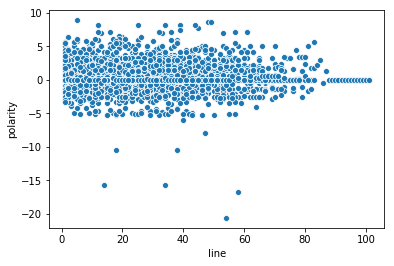

In [77]:
sns.scatterplot(x = "line", y = "polarity", data = taylor)

In [78]:
taylor_reputation = taylor[taylor.album =="reputation"]
taylor_reputation.head()

,artist,album,track_title,track_n,lyric,line,year,no_punc,polarity,category
3856,Taylor Swift,reputation,...Ready for It?,1,knew he was a killer first time that i saw him,1,2017,knew he was a killer first time that i saw him,-3.3,Very Sad
3857,Taylor Swift,reputation,...Ready for It?,1,wondered how many girls he had loved and left ...,2,2017,wondered how many girls he had loved and left ...,0.8,Kind of Happy
3858,Taylor Swift,reputation,...Ready for It?,1,"but if he's a ghost, then i can be a phantom",3,2017,but if he s a ghost then i can be a phantom,-1.3,Sad
3859,Taylor Swift,reputation,...Ready for It?,1,"holdin' him for ransom, some",4,2017,holdin him for ransom some,0.0,Neutral
3860,Taylor Swift,reputation,...Ready for It?,1,"some boys are tryin' too hard, he don't try at...",5,2017,some boys are tryin too hard he don t try at...,-0.4,Neutral


In [79]:
taylor_reputation_singles = taylor_reputation[["track_title", "polarity"]].groupby("track_title").mean()
taylor_reputation_singles.head()

,polarity
track_title,
...Ready for It?,0.008197
Call It What You Want,0.752055
Dancing With Our Hands Tied,0.153731
Delicate,0.530769
Don't Blame Me,0.213846


In [80]:
taylor_reputation_singles.sort_values("polarity")                              

,polarity
track_title,
So It Goes...,-0.217568
...Ready for It?,0.008197
Getaway Car,0.057692
Dancing With Our Hands Tied,0.153731
Gorgeous,0.156897
Don't Blame Me,0.213846
King of My Heart,0.221053
New Year's Day,0.225532
Look What You Made Me Do,0.250685


In [81]:
stream = {"So It Goes..." : 33961953, "...Ready for It?": 23531119, "Getaway Car": 57010785, "Dancing With Our Hands Tied":43913106
         ,"Gorgeous":152338913, "Don't Blame Me":59354650, "King of My Heart": 39710337, "New Year's Day": 36386195
         ,"Look What You Made Me Do":446974333, "End Game (Ft. Ed Sheeran & Future)": 163531469.0, "Delicate": 247267168
          ,"I Did Something Bad":73747884, "Call It What You Want":92972777, "This Is Why We Can't Have Nice Things":39803507
          ,"Dress":39246827}

In [82]:
taylor_reputation_singles["Streams"] = pd.Series(stream)
taylor_reputation_singles

,polarity,Streams
track_title,,
...Ready for It?,0.008197,23531119.0
Call It What You Want,0.752055,92972777.0
Dancing With Our Hands Tied,0.153731,43913106.0
Delicate,0.530769,247267168.0
Don't Blame Me,0.213846,59354650.0
Dress,1.153731,39246827.0
End Game (Ft. Ed Sheeran & Future),0.265347,NaN
Getaway Car,0.057692,57010785.0
Gorgeous,0.156897,152338913.0


In [83]:
taylor_singles = taylor_reputation_singles.fillna(163531469)

In [84]:
taylor_singles.sort_values("polarity")  

,polarity,Streams
track_title,,
So It Goes...,-0.217568,33961953.0
...Ready for It?,0.008197,23531119.0
Getaway Car,0.057692,57010785.0
Dancing With Our Hands Tied,0.153731,43913106.0
Gorgeous,0.156897,152338913.0
Don't Blame Me,0.213846,59354650.0
King of My Heart,0.221053,39710337.0
New Year's Day,0.225532,36386195.0
Look What You Made Me Do,0.250685,446974333.0


In [85]:
taylor_singles = taylor_singles.sort_values("polarity").reset_index()

In [86]:
taylor_singles.head()

,track_title,polarity,Streams
0,So It Goes...,-0.217568,33961953.0
1,...Ready for It?,0.008197,23531119.0
2,Getaway Car,0.057692,57010785.0
3,Dancing With Our Hands Tied,0.153731,43913106.0
4,Gorgeous,0.156897,152338913.0


Text(0.5, 1.0, 'Polarity vs Streams')

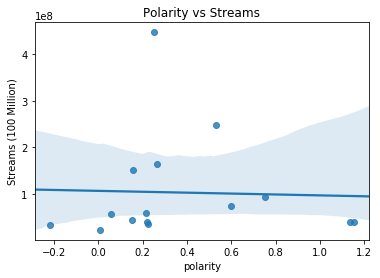

In [87]:
sns.regplot(x = "polarity", y = "Streams", data = taylor_singles)
plt.ylabel("Streams (100 Million)")
plt.title("Polarity vs Streams")

Text(0.5, 1.0, 'Line Polarity Distribution')

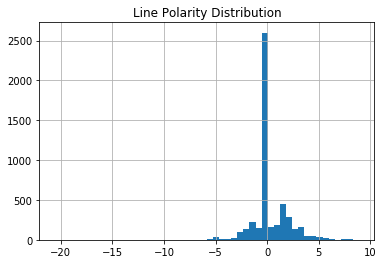

In [88]:
song_polarity_distribution = taylor.hist('polarity', bins=50, sharey=True, sharex=True)
plt.title("Line Polarity Distribution")

In [89]:
taylor_line_counts = taylor.groupby('year').size()

Text(0.5, 1.0, 'Lines of Songs Produced per Year')

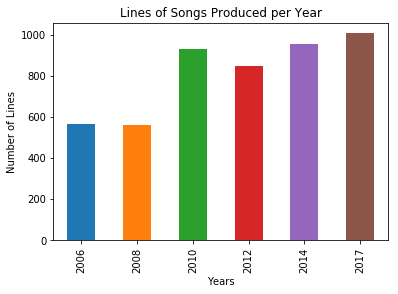

In [90]:
taylor_line_counts.plot.bar()
plt.ylabel("Number of Lines")
plt.xlabel("Years")
plt.title("Lines of Songs Produced per Year")

In [91]:
taylor_songs_albums = taylor[["track_title", "polarity", 'album']].groupby(["track_title", 'album']).mean()
taylor_songs_albums

,,polarity
track_title,album,
...Ready for It?,reputation,0.008197
22,Red,1.026415
A Perfectly Good Heart,Taylor Swift,2.282609
A Place In This World,Taylor Swift,0.255556
All Too Well,Red,0.463830
All You Had to Do Was Stay,1989,0.547143
Back To December,Speak Now,0.642857
Bad Blood,1989,-0.411429
Begin Again,Red,0.713514


In [92]:
taylor

,artist,album,track_title,track_n,lyric,line,year,no_punc,polarity,category
0,Taylor Swift,Taylor Swift,Tim McGraw,1,he said the way my blue eyes shined,1,2006,he said the way my blue eyes shined,0.0,Neutral
1,Taylor Swift,Taylor Swift,Tim McGraw,1,put those georgia stars to shame that night,2,2006,put those georgia stars to shame that night,-2.1,Very Sad
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"i said, ""that's a lie""",3,2006,i said that s a lie,0.0,Neutral
3,Taylor Swift,Taylor Swift,Tim McGraw,1,just a boy in a chevy truck,4,2006,just a boy in a chevy truck,0.0,Neutral
4,Taylor Swift,Taylor Swift,Tim McGraw,1,that had a tendency of gettin' stuck,5,2006,that had a tendency of gettin stuck,-1.0,Kind of Sad
5,Taylor Swift,Taylor Swift,Tim McGraw,1,on backroads at night,6,2006,on backroads at night,0.0,Neutral
6,Taylor Swift,Taylor Swift,Tim McGraw,1,and i was right there beside him all summer long,7,2006,and i was right there beside him all summer long,0.0,Neutral
7,Taylor Swift,Taylor Swift,Tim McGraw,1,and then the time we woke up to find that summ...,8,2006,and then the time we woke up to find that summ...,0.0,Neutral
8,Taylor Swift,Taylor Swift,Tim McGraw,1,but when you think tim mcgraw,9,2006,but when you think tim mcgraw,0.0,Neutral
9,Taylor Swift,Taylor Swift,Tim McGraw,1,i hope you think my favorite song,10,2006,i hope you think my favorite song,3.9,Very Happy


In [140]:
taylor_songs_albums_groups = taylor_songs_albums.groupby('album')

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Polarity per line in Every Song (Grouped by Album)')

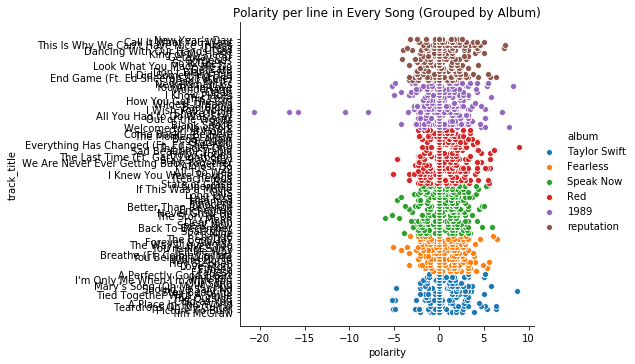

In [141]:
sns.pairplot(x_vars=["polarity"], y_vars=["track_title"], data=taylor, hue="album", size=5)
plt.title('Polarity per line in Every Song (Grouped by Album)')